In [165]:
import pandas as pd
import numpy as np
import tensorflow
from tensorflow import keras

In [166]:
df=pd.read_csv("https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/11_chrun_prediction/customer_churn.csv")

In [167]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [169]:
df.replace("No internet service","No",inplace=True)

In [170]:
for col in df.columns:
  if df[col].dtype=="O" and "Yes" in df[col].unique():
    df[col]=df[col].apply(lambda x :1 if x=="Yes" else 0)

In [171]:
for col in df.columns:
  if df[col].dtype=="O":
    print(df[col].unique())

['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
['Female' 'Male']
['DSL' 'Fiber optic' 'No']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [172]:
df.drop(["customerID"],axis=1,inplace=True)

In [173]:
for col in df.columns:
  if df[col].dtype=="O":
    print(df[col].unique())

['Female' 'Male']
['DSL' 'Fiber optic' 'No']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']


In [174]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",0).astype(float)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [176]:
for col in df.columns:
  if df[col].dtype=="O":
    print(df[col].unique())

['Female' 'Male']
['DSL' 'Fiber optic' 'No']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [177]:
df["gender"]=df["gender"].apply(lambda x :1 if x=="Male" else 0)

In [178]:
for col in df.columns:
  if df[col].dtype=="O":
    print(col,df[col].unique())

InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [179]:
df=pd.get_dummies(df,columns=["InternetService","Contract","PaymentMethod"],dtype="int")

In [180]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [181]:
df.shape

(7043, 27)

In [182]:
df.isnull().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_T

In [183]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [184]:
Dep_fetautres=df.iloc[:,:-1]
indep_Features=df.iloc[:,-1]

In [185]:
from sklearn.model_selection import train_test_split

In [186]:
X_train,X_test,y_train,y_test=train_test_split(Dep_fetautres,indep_Features,test_size=0.2,random_state=42)

In [187]:
from imblearn.over_sampling import SMOTE

In [188]:
smote_model=SMOTE()

In [189]:
X_train_sm,y_train_sm=smote_model.fit_resample(X_train,y_train)

In [190]:
X_train_sm.shape

(8704, 26)

In [191]:
y_train_sm.shape

(8704,)

In [192]:
y_train_sm.value_counts()

PaymentMethod_Mailed check
1    4352
0    4352
Name: count, dtype: int64

In [193]:
model=keras.models.Sequential([
    keras.layers.Dense(26,activation="relu"),
    keras.layers.Dense(15,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=["accuracy"])

In [194]:
history=model.fit(X_train_sm,y_train_sm,epochs=10)

Epoch 1/10
272/272 [==============================] - 1s 2ms/step - loss: 1.1277 - accuracy: 0.5846
Epoch 2/10
272/272 [==============================] - 1s 2ms/step - loss: 0.7156 - accuracy: 0.6996
Epoch 3/10
272/272 [==============================] - 1s 2ms/step - loss: 0.5877 - accuracy: 0.7553
Epoch 4/10
272/272 [==============================] - 1s 2ms/step - loss: 0.6309 - accuracy: 0.7716
Epoch 5/10
272/272 [==============================] - 1s 2ms/step - loss: 0.5363 - accuracy: 0.7934
Epoch 6/10
272/272 [==============================] - 1s 2ms/step - loss: 0.6153 - accuracy: 0.8000
Epoch 7/10
272/272 [==============================] - 1s 3ms/step - loss: 0.3610 - accuracy: 0.8681
Epoch 8/10
272/272 [==============================] - 1s 2ms/step - loss: 0.3952 - accuracy: 0.8645
Epoch 9/10
272/272 [==============================] - 1s 2ms/step - loss: 0.2724 - accuracy: 0.9074
Epoch 10/10
272/272 [==============================] - 1s 2ms/step - loss: 0.2533 - accuracy: 0.9233

In [195]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

In [196]:
import matplotlib.pyplot as plt
%matplotlib inline

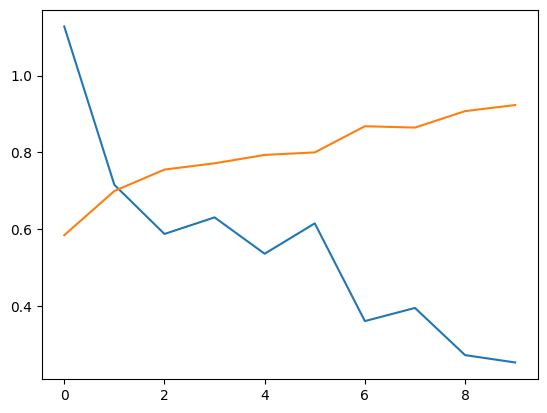

In [197]:
plt.plot(history.history["loss"])
plt.plot(history.history["accuracy"])

In [198]:
preds=model.predict(X_test)

45/45 [==============================] - 0s 2ms/step


In [199]:
preds=[0 if i<0.5 else 1 for i in preds]

In [200]:
from sklearn.metrics import confusion_matrix

In [201]:
print(confusion_matrix(preds,y_test))

[[1046   75]
 [  33  255]]


In [202]:
model.evaluate(X_test,y_test)

45/45 [==============================] - 0s 3ms/step - loss: 0.1929 - accuracy: 0.9233


[0.19285137951374054, 0.923349916934967]

In [203]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'predicted')

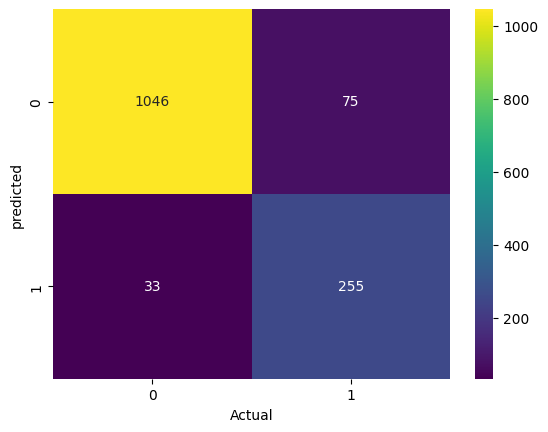

In [206]:
sns.heatmap(confusion_matrix(preds,y_test),annot=True,fmt="d",cmap="viridis")
plt.xlabel("Actual")
plt.ylabel("predicted")

In [208]:
y_test.value_counts()

PaymentMethod_Mailed check
0    1079
1     330
Name: count, dtype: int64

In [226]:
pd.Series(preds).value_counts()

0    1121
1     288
Name: count, dtype: int64